In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Train.csv")
print(ds.info())
print(ds.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
feature_1    1600 non-null float64
feature_2    1600 non-null float64
feature_3    1600 non-null float64
feature_4    1600 non-null float64
feature_5    1600 non-null float64
target       1600 non-null float64
dtypes: float64(6)
memory usage: 75.1 KB
None
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')


In [3]:
X = ds.values
print(type(X))
print(X[:5,:])

<class 'numpy.ndarray'>
[[  0.29341624  -0.94559871  -0.42110515   0.40681602   0.52566183
  -82.15466656]
 [ -0.83608408  -0.18922804  -0.77640262  -1.05383124   0.59799685
  -48.89796018]
 [  0.23642511   0.13283602  -0.14772298   0.69985396  -0.18736416
   77.2703707 ]
 [  0.17531181   0.14319424  -0.58111096  -0.12210693  -1.29216807
   -2.98858081]
 [ -1.69301097   0.54271187  -2.79872942  -0.68672304   1.24407683
  -37.59672212]]


In [4]:
Y = X[:,5]
print(Y.shape)
X = X[:,:5]
print(X.shape)

(1600,)
(1600, 5)


In [5]:
#normalizing data
x_mean = X.mean(axis=0)
print(x_mean.shape)
x_std = X.std(axis=0)
print(x_std.shape)
X = (X-x_mean)/x_std

(5,)
(5,)


In [6]:
def hypothesis(theta,x):
    return np.dot(theta,x)


def error(theta,x,y):
    err=0;
    m = x.shape[0];
    for ix in range(m):
        hyp = hypothesis(theta,x[ix,:])
        err += (y[ix]-hyp)**2
    return err/(2*x.shape[0])

def gradient(theta,x,y):
    grad = np.zeros(theta.shape[0])
    m = x.shape[0];
    for ix in range(m):
        hyp = hypothesis(theta,x[ix,:])
        grad += (y-hyp)*x[ix,:]
    return grad/m

def gradientdescent(x,y,n=0.001):
    theta = np.zeros(x.shape[1])
    err = []
    k=0;
    for ix in range(2500):
        temp = error(theta,x,y)
        err.append(temp)
        print(temp)
        X_p= x[k,:]
        X_p= X_p.reshape(1,-1)
#         print(X_p.shape)
        theta = theta + n*gradient(theta,X_p,y[k])
        k=k+1
        if(k>=x.shape[0]):
            k=0
    err = err[1:]
    return theta,err
    

In [7]:
theta,er = gradientdescent(X,Y)
er = np.array(er)
# print(er)
th = np.arange(er.shape[0])
# print(th)

6128.06520702
6123.34453795
6119.244267
6115.15465468
6115.19669521
6114.1209925
6097.42080875
6097.39553271
6097.03290722
6097.44400475
6092.63200064
6090.83225181
6085.08877483
6077.08121955
6060.72060738
6036.05113327
6034.97913591
6030.3830374
6030.72156811
6029.9240738
6026.27099496
6023.57184622
5968.47472894
5947.18011116
5923.01075664
5883.5145251
5855.58513644
5855.77469789
5854.88062748
5851.23867599
5804.57075479
5778.2756877
5761.60047742
5761.1065967
5760.49010367
5742.31790263
5735.37799059
5727.72015775
5692.9625685
5689.61746132
5678.75813534
5671.05268545
5648.63515881
5648.3080139
5640.79698251
5608.77479262
5598.35015736
5485.01490559
5484.70134164
5484.56126454
5474.29961454
5470.83251582
5468.13297924
5462.48141719
5451.48377022
5444.0860615
5443.3491378
5430.32776173
5422.69158424
5395.08145832
5392.50765284
5392.38685577
5376.83635699
5365.20345829
5329.35613869
5328.57325471
5322.23580802
5317.10374019
5298.65549771
5294.88587681
5294.80826202
5251.00752386
5234

1962.22698169
1958.02908853
1957.07909293
1957.14543953
1936.03495912
1933.35672831
1933.45495018
1932.54571855
1930.26564548
1929.14241497
1929.23214482
1929.11481183
1910.19489438
1895.56089931
1894.7903342
1891.9059985
1885.21595108
1885.42791474
1885.513071
1879.21978676
1873.46983995
1873.1056547
1867.59779261
1867.65629606
1854.20747394
1853.54640157
1851.96499659
1851.41433663
1848.24942403
1843.36738151
1842.64823417
1842.45031617
1841.2284124
1841.68641988
1839.57277437
1838.48626141
1838.515516
1838.28133383
1832.00478612
1819.52406334
1816.25550992
1816.59026433
1816.43282003
1811.38667271
1811.48739456
1811.51538814
1806.32572044
1803.06374005
1800.61578997
1800.29190005
1794.26066253
1791.26488981
1789.488135
1789.416254
1789.87115848
1789.31955592
1789.12719709
1788.01908219
1787.27482212
1774.67369959
1771.97974605
1771.89868257
1764.19503561
1763.71586217
1762.23348812
1761.74002335
1762.05681954
1761.22940244
1761.35420677
1761.2781914
1761.27816797
1760.30792546
1757.

730.989820141
730.163328238
730.123605457
729.972327267
729.895338858
730.248969542
730.321996965
727.029056307
725.092126276
725.147746603
722.365605133
722.361708974
721.590987004
721.341859392
721.240650388
720.736390187
720.742667955
720.434479266
718.267348425
718.459943856
717.390225183
717.39968265
717.287492106
709.476089335
709.520524519
709.823249411
707.640745683
708.091249409
708.087419004
707.998599122
707.951422467
708.405559028
708.275257859
708.274684279
706.822342041
702.960065838
701.46808572
701.439772261
701.027835351
698.366003688
696.814276248
695.719097657
695.782427393
696.008266683
694.164804388
694.08376614
692.981886749
693.143626943
688.399477244
687.351525187
687.164737733
686.793574166
686.668948517
686.528225217
686.44018994
685.381258584
685.139248263
684.75038004
680.330594242
680.797689285
677.666209206
676.73799925
676.881304476
677.177036605
673.486237052
672.096967635
672.2130225
667.154831478
666.403838542
663.981258064
663.851354708
662.953386661


374.223897886
373.236760863
373.279273484
371.835222246
371.614407561
370.195806278
368.958178197
368.94774392
368.866243247
368.74755481
368.441451696
368.512405674
368.608435297
368.6555425
368.544533048
368.435647321
367.108806389
367.142583379
367.204065086
365.758376281
365.802895185
365.691493696
365.72916472
366.064873941
365.890036195
365.802993036
365.227460996
364.642921082
364.73067252
364.230490436
363.632441075
363.60962753
362.752892688
363.009747836
363.251721914
363.194502306
363.285279875
363.275350452
363.260873957
363.360110074
363.10220243
359.21850927
359.026440122
358.825795104
358.46414611
356.41741109
356.355393298
355.501269616
355.493491757
355.33651122
355.071487455
355.353204193
355.392381577
355.209568396
354.376178136
353.718593057
353.540026457
353.12793598
352.750951568
352.065497303
351.683331263
351.666195916
351.696773759
351.804269186
351.790955678
351.694833899
351.785274238
351.091590206
350.65866214
350.612219264
350.477629804
350.686182284
349.81

259.492192029
259.48403514
259.234475111
259.205323898
259.21256949
259.040458189
258.65538527
258.37697734
258.194162084
258.082383889
258.085935314
258.111313662
258.118402887
257.475035319
257.157278069
257.159768069
257.120887885
257.168324848
256.801128501
256.700794049
256.262438008
256.296832622
256.362375658
256.404326892
256.339016691
256.113748525
256.094638973
256.088550989
255.962642308
255.805462497
255.83967554
255.860149016
255.871421896
255.664391196
255.632389189
255.636227071
255.690663105
255.606912715
255.638767423
255.574683723
255.50548571
255.441377349
255.497561479
255.511474442
255.494889181
255.605036014
255.256891513
255.256764565
255.338128549
255.380847657
255.391066147
255.410811471
255.545153343
255.551543799
255.507702563
255.13917501
255.29203726
255.432971483
255.312076404
255.25473613
255.243991154
255.238813173
254.742663594
254.753981937
254.797954967
254.686107465
254.390403134
254.383452026
254.350096137
254.393620475
254.539344421
254.331131458
2

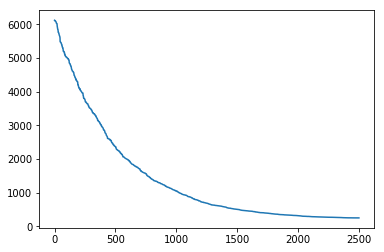

In [8]:
plt.plot(th,er)

In [9]:
def accuracy(theta,x,y): #coeffecient of determination
    acc = 0
    y_p = np.zeros(x.shape[0])
    for ix in range(x.shape[0]):
        y_p[ix] = hypothesis(theta,x[ix])
    r_n = np.sum((y-y_p)**2)
    r_d = np.sum((y-y.mean())**2)
    print(r_n,r_d)
    
    r = 1-r_n/r_d  
    return r;

    

In [10]:
ms = pd.read_csv("Test.csv")
ms.columns
ms=ms.values
print(ms.shape)

(400, 6)


In [11]:
x_test = ms[:,:5]
y_test = ms[:,5]
print(x_test.shape,y_test.shape)

(400, 5) (400,)


In [12]:
print(accuracy(theta,x_test,y_test)) #testing score

201733.672596 5198086.82572
0.961190784348


In [13]:
print(accuracy(theta,X,Y)) #training score

810977.029478 19609646.0128
0.958643974045
